# SARIMAX on electricity carbon intensity

The website [**electricitymap.org**](https://electricitymap.org) provides real-time data-viz about the origin of electricity consumed around the world. In particular, it provides hourly view of the CO2-intensity of electricity in grams of CO2-equivalent per kWh electricity consumed (gCO2e/kWh).

<img src='electricitymap.jpg' width = 500>


Carbon intensity flucutates a lot depending on seasons, weather conditions, imports from neighbors countries, etc...

Your goal is to **forecast the hourly carbon intensity of electricity in France up to 48 hours ahead** so as to inform when is best to consumer electricity (e.g. charge electric car)

## Challenge

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [ ]:
# Load the 50Mo CSV!
df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/electricity_map_france.csv', parse_dates=['datetime'], index_col=['datetime'])
df = df['2016':]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32691 entries, 2016-01-01 00:00:00+00:00 to 2019-09-26 08:00:00+00:00
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   timestamp                                     32691 non-null  int64  
 1   zone_name                                     32691 non-null  object 
 2   carbon_intensity_avg                          32613 non-null  float64
 3   carbon_intensity_production_avg               32613 non-null  float64
 4   carbon_intensity_discharge_avg                20952 non-null  float64
 5   carbon_intensity_import_avg                   23618 non-null  float64
 6   carbon_rate_avg                               32613 non-null  float64
 7   total_production_avg                          32613 non-null  float64
 8   total_storage_avg                             32613 non-null  float64
 9   total_discharg

In [ ]:
# We provide you with this method for fast plotting
def plot_autocorrelation(y, d=0, D=0, m=0):
    y = pd.Series(y)
    if D > 0:
        for i in range(D):
            y = y.diff(m)
    if d > 0:
        for i in range(d):
            y = y.diff(1)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,2,3)
    ax3 = fig.add_subplot(2,2,4)
    ax1.plot(y)
    plot_acf(y, lags = 50, ax=ax2);
    plot_pacf(y, lags=50, method='ywm', ax=ax3, color='r');
    plt.show()

### Your challenge
- Your goal is to predict `carbon_intensity_avg` up to 48h ahead.
- We have 6 years of data at hourly granularity! Enough to make proper `cross_validated` score of `rmpe` over the whole dataset!
- You have access to exogeneous forecast prefixed by `latest_forecasted_` 
    - e.g. you can use `latest_forecasted_price_avg(t+i)` when trying to predict `carbon_intensity_avg(t+i)`
    - for i in [1..48]

### Hints

- You can build a `SARMIAX` model with `exog` features
- Or, you can build your own "traditional" ML-based model, optimizing for the 48h ahead time horizon

## Your turn

In [ ]:
train_size = 0.7
index = round(train_size*df.shape[0])
df_train = df.iloc[:index]
df_test = df.iloc[index+1:]

y = df['carbon_intensity_avg']
y_train = df_train['carbon_intensity_avg']
y_test = df_test['carbon_intensity_avg']

exog = df['latest_forecasted_price_avg']
exog_train = df_train['latest_forecasted_price_avg']
exog_test = df_test['latest_forecasted_price_avg']

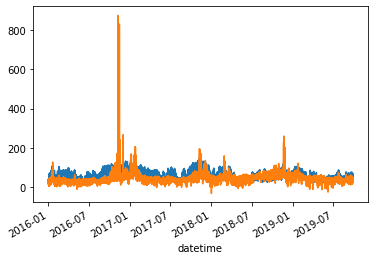

In [ ]:
%matplotlib widget
%matplotlib inline
# requires a pip install ipympl
# https://github.com/matplotlib/ipympl

y.plot()
df.latest_forecasted_price_avg.plot();

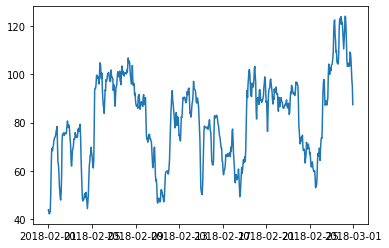

In [ ]:
plt.plot(y['2018-02']);

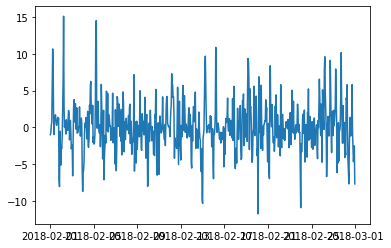

In [ ]:
plt.plot(y['2018-02'].diff(1));

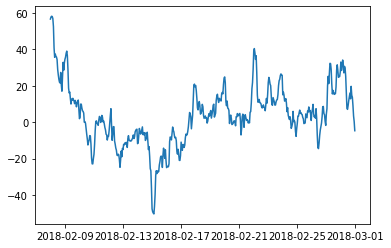

In [ ]:
plt.plot(y['2018-02'].diff(24*7));

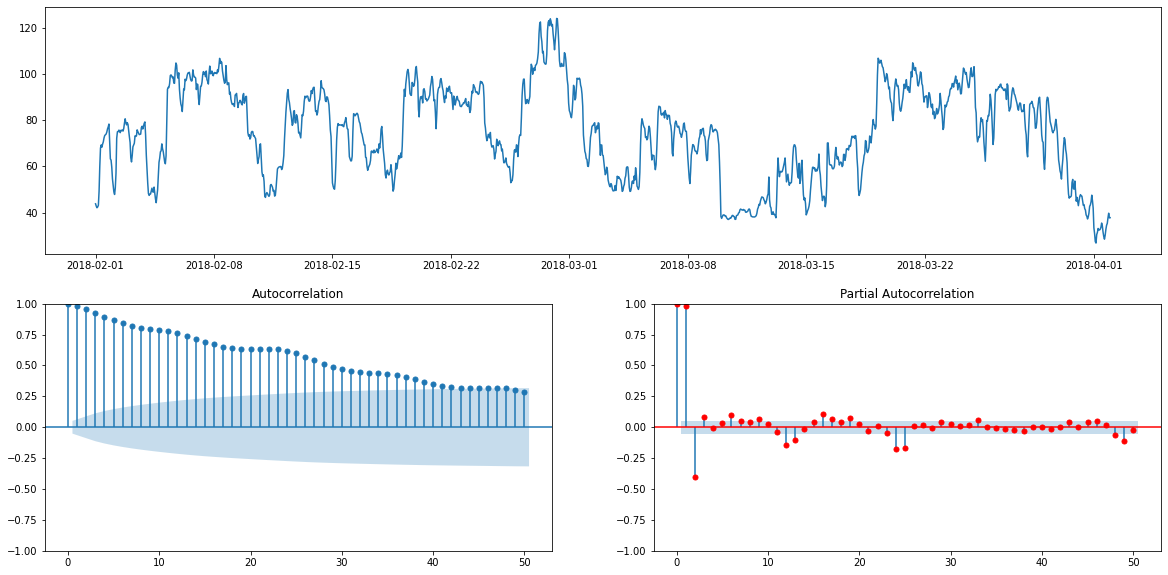

In [ ]:
plot_autocorrelation(y_train['2018-02-01':'2018-04-01'], D=0, m=168)